Task 1 : Prediction using supervised ML

Predict the percentage of student based  on the hours of study

In [26]:
#necessary imports
import pandas as ps 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Data Analysis 

In [3]:
#reading the data
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)

print(df)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#cheking for null values
df.isna().sum()

Hours     0
Scores    0
dtype: int64

Visualization of hours vs percentage

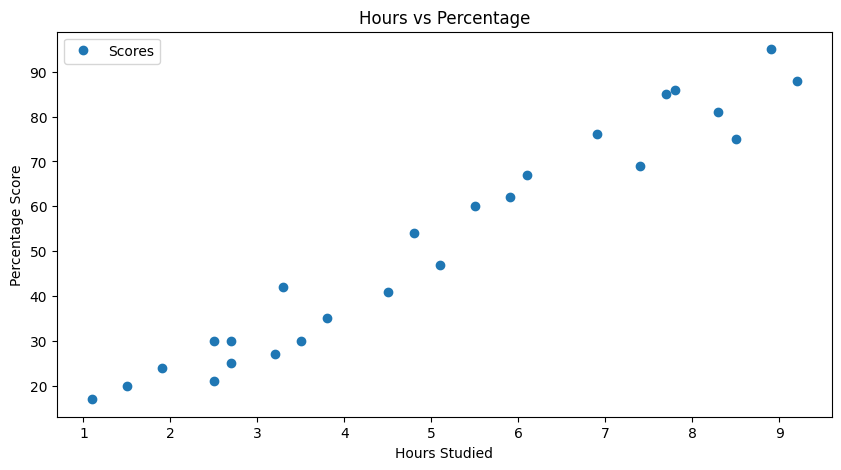

In [11]:
df.plot(x='Hours', y='Scores', style='o', figsize=(10,5), )
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

Model building and trainig

Spliting the data


In [12]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Model trainig

In [16]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

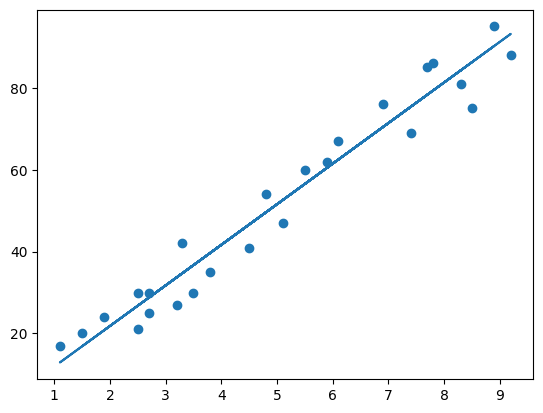

In [19]:
line = regressor.coef_*X+regressor.intercept_

plt.scatter(X, y)
plt.plot(X, line);
plt.show()


In [20]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [21]:
y_pred = regressor.predict(X_test)

In [23]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


What will be predicted score if a student studies for 9.25 hrs/day ?

In [24]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))


No of Hours = 9.25
Predicted Score = 93.69173248737535


Calculating the metrics

In [34]:
from sklearn.metrics import r2_score

mean_absolute_error = mean_squared_error(y_test, y_pred)
print("Mean Absolute Error: ", mean_absolute_error)
r2 = r2_score(y_test, y_pred)
print("R2 Score: ", r2 * 100)


Mean Absolute Error:  21.598769307217406
R2 Score:  94.54906892105355
